# Jupyter para o trabalho de SGBD

**Nomes dos integrantes:** Felipe Fahrion, Jonathan Cardarelli, Miguel Zanela

**Base de dados escolhida:** Contraceptive Method Choice Data Set http://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice

**Coluna alvo:** Contraceptive Method Used

**Objetivo do modelo:** É prever a escolha do método anticoncepcional atual (sem uso, métodos de longo prazo ou métodos de curto prazo) de mulheres que residem na Indonésia com base em suas características demográficas e socioeconômicas.

**Justificativa da escolha:** Prever qual o método contraceptivo será utilizado por mulheres com base em suas características demográficas e socioeconômicas e com isso será possível criar campanhas de conscientização direcionadas ao público suscetível ao não uso de métodos contraceptivos.

# Análise exploratória



- Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score   
from sklearn.metrics import recall_score      
from sklearn.metrics import f1_score          

- Selecionando a base de dados a ser trabalhada

In [2]:
df = pd.read_csv('cmc-dados.csv')

- Informações gerais sobre a base de dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Wife age                      1473 non-null   int64
 1   Wife education                1473 non-null   int64
 2   Husband education             1473 non-null   int64
 3   Number of children ever born  1473 non-null   int64
 4   Wife religion                 1473 non-null   int64
 5   Wife now working              1473 non-null   int64
 6   Husband occupation            1473 non-null   int64
 7   Standard-of-living index      1473 non-null   int64
 8   Media exposure                1473 non-null   int64
 9   Contraceptive method used     1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


- Listando as primeiras linhas

In [4]:
df.head(10)

,Wife age,Wife education,Husband education,Number of children ever born,Wife religion,Wife now working,Husband occupation,Standard-of-living index,Media exposure,Contraceptive method used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
5,19,4,4,0,1,1,3,3,0,1
6,38,2,3,6,1,1,3,2,0,1
7,21,3,3,1,1,0,3,2,0,1
8,27,2,3,3,1,1,3,4,0,1
9,45,1,1,8,1,1,2,2,1,1


- Verificando a quantidade de valores nas colunas

In [5]:
df['Wife religion'].value_counts()

1    1253
0     220
Name: Wife religion, dtype: int64

In [6]:
df['Media exposure'].value_counts()

0    1364
1     109
Name: Media exposure, dtype: int64

In [7]:
df['Wife now working'].value_counts()

1    1104
0     369
Name: Wife now working, dtype: int64

- Separando os tipos de atributos

In [8]:
atributos_numericos   = ['Wife age','Number of children ever born']
atributos_categoricos = ['Wife education','Husband education','Husband occupation','Standard-of-living index']
atributos_binarios    = ['Wife religion','Wife now working','Media exposure']

- Calculando e imprimindo histogramas sobre todas as colunas

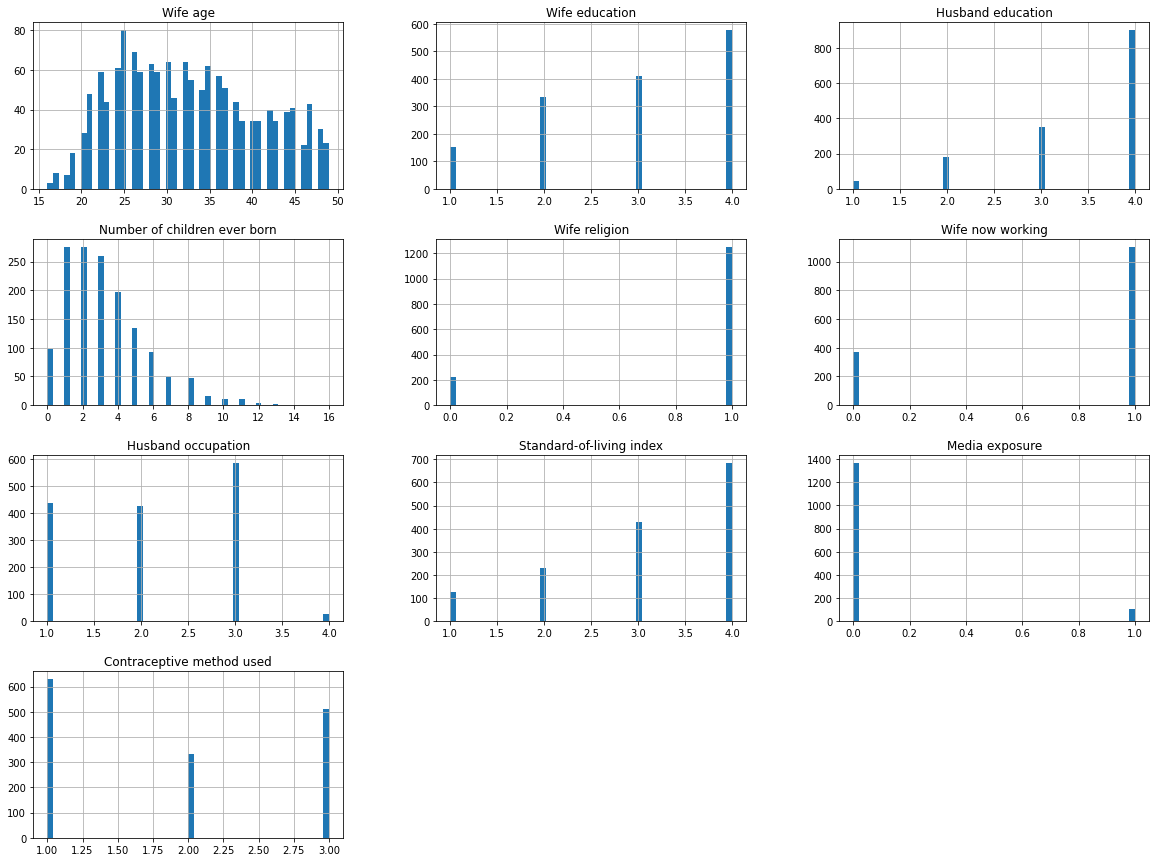

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()

- Gráficos de dispersão comparando todas as colunas entre si

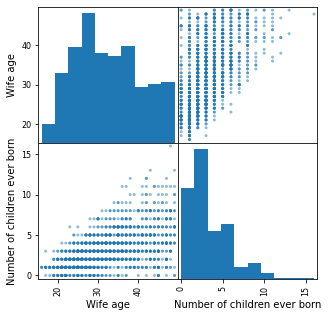

In [10]:
pd.plotting.scatter_matrix(df[atributos_numericos],figsize=(5, 5))
plt.show()

- Calculando uma matríz de correlações entre as colunas preditivas numéricas escolhidas

In [11]:
corr = np.corrcoef(df[atributos_numericos],rowvar=False)
corr

array([[1.        , 0.54012589],
       [0.54012589, 1.        ]])

  # Pré-processamento

- Imports

In [12]:
from sklearn.model_selection import train_test_split

- transformando nossa coluna alvo em binaria

In [13]:
df['Contraceptive method used bin'] = 0
df.loc[df['Contraceptive method used']==2,'Contraceptive method used bin'] = 1
df.loc[df['Contraceptive method used']==3,'Contraceptive method used bin'] = 1

df['Contraceptive method used bin'].value_counts()

1    844
0    629
Name: Contraceptive method used bin, dtype: int64

- aplicando a transformação de coluna alvo númerica para string

In [14]:
df['Contraceptive method used'] = df['Contraceptive method used bin'].apply(str)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Wife age                       1473 non-null   int64 
 1   Wife education                 1473 non-null   int64 
 2   Husband education              1473 non-null   int64 
 3   Number of children ever born   1473 non-null   int64 
 4   Wife religion                  1473 non-null   int64 
 5   Wife now working               1473 non-null   int64 
 6   Husband occupation             1473 non-null   int64 
 7   Standard-of-living index       1473 non-null   int64 
 8   Media exposure                 1473 non-null   int64 
 9   Contraceptive method used      1473 non-null   object
 10  Contraceptive method used bin  1473 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 126.7+ KB


 - Tirando a coluna auxiliar 'Contraceptive method used bin'

In [16]:
df = df.drop(columns='Contraceptive method used bin')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Wife age                      1473 non-null   int64 
 1   Wife education                1473 non-null   int64 
 2   Husband education             1473 non-null   int64 
 3   Number of children ever born  1473 non-null   int64 
 4   Wife religion                 1473 non-null   int64 
 5   Wife now working              1473 non-null   int64 
 6   Husband occupation            1473 non-null   int64 
 7   Standard-of-living index      1473 non-null   int64 
 8   Media exposure                1473 non-null   int64 
 9   Contraceptive method used     1473 non-null   object
dtypes: int64(9), object(1)
memory usage: 115.2+ KB


In [18]:
df['Contraceptive method used'].value_counts()

1    844
0    629
Name: Contraceptive method used, dtype: int64

- Separando um conjunto de dados para teste e outro para treino


In [19]:
df_treino, df_teste = train_test_split(df, test_size=0.15, random_state=35)

- Separando a coluna alvo do conjunto de treino

In [20]:
df_treino_labels = df_treino['Contraceptive method used'].copy()
df_treino = df_treino.drop(columns='Contraceptive method used')


- Separando a coluna alvo do conjunto de teste

In [21]:
df_teste_labels = df_teste['Contraceptive method used'].copy()
df_teste = df_teste.drop(columns='Contraceptive method used')

- Verificando a quantidade de valores nas colunas Da tabela de **treino**

In [22]:
df_treino['Wife religion'].value_counts()

1    1070
0     182
Name: Wife religion, dtype: int64

In [23]:
df_treino['Media exposure'].value_counts()

0    1160
1      92
Name: Media exposure, dtype: int64

In [24]:
df_treino['Wife now working'].value_counts()

1    931
0    321
Name: Wife now working, dtype: int64

- Verificando a quantidade de valores nas colunas ta tabela de **teste**

In [25]:
df_teste['Wife religion'].value_counts()

1    183
0     38
Name: Wife religion, dtype: int64

In [26]:
df_teste['Media exposure'].value_counts()

0    204
1     17
Name: Media exposure, dtype: int64

In [27]:
df_teste['Wife now working'].value_counts()

1    173
0     48
Name: Wife now working, dtype: int64

## Automação

- Imports

In [28]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

- Aplicando a função de Pipeline:

In [29]:
pipeline_atr_numericos = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

- Pré-processamento

In [30]:
preproc_completo = ColumnTransformer([
    ('numericos', pipeline_atr_numericos, atributos_numericos),
    ('binarios', 'passthrough', atributos_binarios),
    ('categoricos', OneHotEncoder(), atributos_categoricos),
    ], 
    sparse_threshold=0)

- Aplicando

In [31]:
# Pre-processamento do conjunto de treino
X_treino = preproc_completo.fit_transform(df_treino)

# Pre-processamento do conjunto de teste
X_teste = preproc_completo.transform(df_teste)

In [32]:
# Coluna alvo para os conjuntos de treino e teste
y_treino = df_treino_labels.values
y_teste = df_teste_labels.values

In [33]:
y_treino

array(['0', '1', '1', ..., '0', '1', '1'], dtype=object)

In [34]:
X_treino.shape

(1252, 21)

In [35]:
X_teste.shape

(221, 21)

In [36]:
y_treino.shape

(1252,)

In [37]:
y_teste.shape

(221,)

# Treinamento/Avaliação de desempenho/Otimizações

## Regressão Logística

#### Imports

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

#### Treinamento

In [39]:
log_reg = LogisticRegression(max_iter=300)

log_reg.fit(X_treino, y_treino)
log_reg.classes_

array(['0', '1'], dtype=object)

In [40]:
# probabilidade estimada

y_probabilidade_reglog = log_reg.predict_proba(X_teste)
np.round(y_probabilidade_reglog, decimals=2)[0:10]

array([[0.33, 0.67],
       [0.72, 0.28],
       [0.65, 0.35],
       [0.17, 0.83],
       [0.3 , 0.7 ],
       [0.41, 0.59],
       [0.34, 0.66],
       [0.26, 0.74],
       [0.21, 0.79],
       [0.91, 0.09]])

In [41]:
# previsões

y_previsto_reglog = log_reg.predict(X_teste)
y_previsto_reglog

array(['1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0',
       '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1',
       '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0',
       '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1',
       '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1',
       '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0',
       '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1',
       '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1',
       '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1',
       '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1',
       '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1

In [42]:
y_teste

array(['1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0',
       '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0',
       '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1',
       '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1',
       '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0',
       '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1',
       '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1',
       '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0',
       '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1',
       '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '0', '1',
       '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1',
       '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1

### Avaliação de desempenho

In [43]:
print("Matriz de confusão:")
print(confusion_matrix(y_teste, y_previsto_reglog))
print()
print("Acurácia: ", accuracy_score(y_teste, y_previsto_reglog))
print("Precisão: ", precision_score(y_teste, y_previsto_reglog, pos_label='0'))
print("Recall  : ", recall_score(y_teste, y_previsto_reglog, pos_label='0'))
print("F1      : ", f1_score(y_teste, y_previsto_reglog, pos_label='0'))

Matriz de confusão:
[[ 53  45]
 [ 20 103]]

Acurácia:  0.7058823529411765
Precisão:  0.726027397260274
Recall  :  0.5408163265306123
F1      :  0.6198830409356725


## Árvore de Decisão

#### Imports

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#### Treinamento

In [45]:
arvore = DecisionTreeClassifier(max_depth=4)
arvore.fit(X_treino, y_treino)
arvore.classes_

array(['0', '1'], dtype=object)

In [46]:
# probabilidade estimada da árvore de decisão

y_probabilidade_arvore = arvore.predict_proba(X_teste)
np.round(y_probabilidade_arvore, decimals=2)[0:10]

array([[0.29, 0.71],
       [1.  , 0.  ],
       [0.51, 0.49],
       [0.16, 0.84],
       [0.32, 0.68],
       [1.  , 0.  ],
       [0.62, 0.38],
       [0.16, 0.84],
       [0.16, 0.84],
       [0.62, 0.38]])

In [47]:
y_previsto_arvore = arvore.predict(X_teste)
y_previsto_arvore[0:25]

array(['1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0',
       '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0'],
      dtype=object)

In [48]:
acertos_arvore = y_previsto_arvore == y_teste
acertos_arvore[0:20]

array([ True,  True,  True,  True,  True, False, False, False,  True,
        True, False,  True,  True,  True, False, False,  True,  True,
        True,  True])

In [49]:
valores_arvore, quantidades_arvore = np.unique(acertos_arvore, return_counts=True)
print(np.asarray((valores_arvore, quantidades_arvore)))

[[  0   1]
 [ 58 163]]


### Visualização

In [50]:
nomes_atributos = np.append( atributos_numericos, 
                             preproc_completo.named_transformers_['categoricos'].get_feature_names())

[Text(361.0588235294117, 587.0880000000001, 'Number of children ever born <= -1.184\ngini = 0.488\nsamples = 100.0%\nvalue = [0.424, 0.576]\nclass = 1'),
 Text(131.2941176470588, 456.624, 'Wife age <= -1.854\ngini = 0.025\nsamples = 6.3%\nvalue = [0.987, 0.013]\nclass = 0'),
 Text(65.6470588235294, 326.1600000000001, 'gini = 0.0\nsamples = 0.1%\nvalue = [0.0, 1.0]\nclass = 1'),
 Text(196.94117647058823, 326.1600000000001, 'gini = 0.0\nsamples = 6.2%\nvalue = [1.0, 0.0]\nclass = 0'),
 Text(590.8235294117646, 456.624, 'x1_3 <= 0.5\ngini = 0.474\nsamples = 93.7%\nvalue = [0.386, 0.614]\nclass = 1'),
 Text(328.235294117647, 326.1600000000001, 'Wife age <= 0.591\ngini = 0.498\nsamples = 56.6%\nvalue = [0.467, 0.533]\nclass = 1'),
 Text(196.94117647058823, 195.69600000000003, 'Number of children ever born <= -0.337\ngini = 0.471\nsamples = 41.0%\nvalue = [0.38, 0.62]\nclass = 1'),
 Text(131.2941176470588, 65.23200000000008, 'gini = 0.5\nsamples = 17.3%\nvalue = [0.507, 0.493]\nclass = 0'),
 

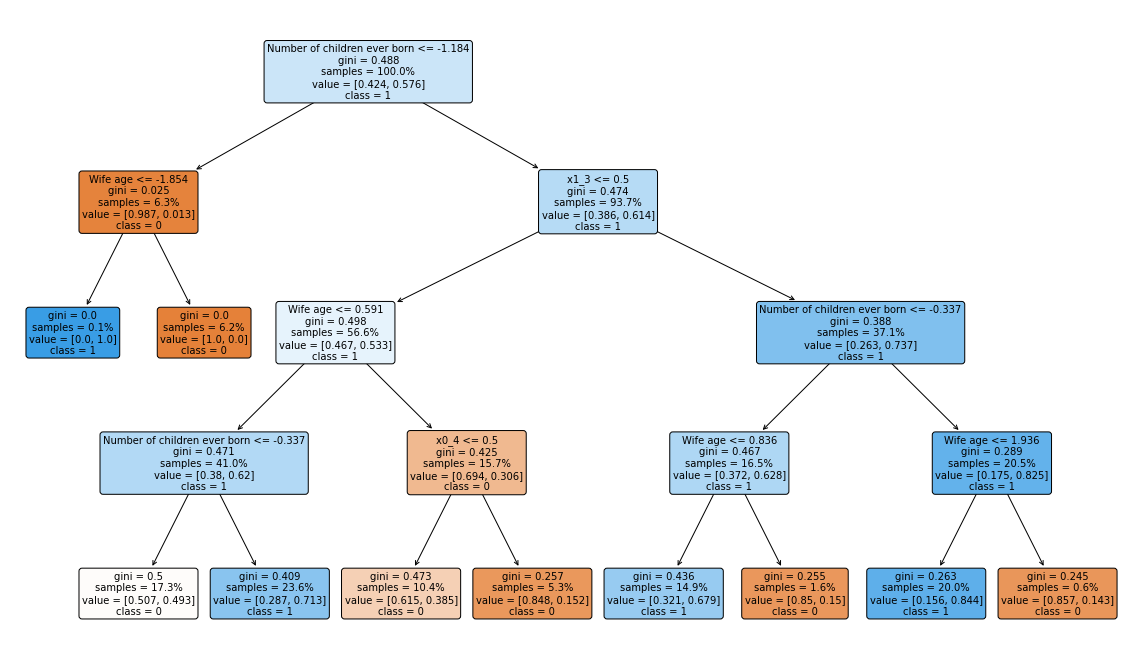

In [51]:
plt.figure(figsize=(20,12))

tree.plot_tree(arvore,
              feature_names=nomes_atributos,
              class_names=arvore.classes_,
              rounded=True,
              filled=True,
              proportion=True,
              fontsize=10)

### Avaliação de desempenho


In [52]:
print("Matriz de confusão:")
print(confusion_matrix(y_teste, y_previsto_arvore))
print()
print("Acurácia: ", accuracy_score(y_teste, y_previsto_arvore))
print("Precisão: ", precision_score(y_teste, y_previsto_arvore, pos_label='0'))
print("Recall  : ", recall_score(y_teste, y_previsto_arvore, pos_label='0'))
print("F1      : ", f1_score(y_teste, y_previsto_arvore, pos_label='0'))

Matriz de confusão:
[[72 26]
 [32 91]]

Acurácia:  0.7375565610859729
Precisão:  0.6923076923076923
Recall  :  0.7346938775510204
F1      :  0.7128712871287128


## Comitês de Aprendizagem

### Imports

In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### Treinamento

In [54]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(30,15), max_iter=2000)
knn_clf = KNeighborsClassifier(5)
svm_clf = SVC(kernel="rbf", C=1.0, probability=True)
logreg2 = LogisticRegression(max_iter=300)
arvore2 = DecisionTreeClassifier(max_depth=4)

In [55]:

print("Estimador................: Acur. - Prec. - Rec.  - F1")
print("--------------------------------------------------------")
for estimador in (logreg2,arvore2,mlp_clf,knn_clf,svm_clf):
    estimador.fit(X_treino, y_treino)
    previsoes = estimador.predict(X_teste)
    print("%.25s: %2.3f - %2.3f - %2.3f - %2.3f" 
                                  %(estimador.__class__.__name__.ljust(25, '.'), 
                                    accuracy_score(  y_teste, previsoes),
                                    precision_score( y_teste, previsoes, pos_label='0'),
                                    recall_score(    y_teste, previsoes, pos_label='0'),
                                    f1_score(        y_teste, previsoes, pos_label='0'),
                                   ))

Estimador................: Acur. - Prec. - Rec.  - F1
--------------------------------------------------------
LogisticRegression.......: 0.706 - 0.726 - 0.541 - 0.620
DecisionTreeClassifier...: 0.738 - 0.692 - 0.735 - 0.713
MLPClassifier............: 0.652 - 0.615 - 0.571 - 0.593
KNeighborsClassifier.....: 0.638 - 0.632 - 0.439 - 0.518
SVC......................: 0.751 - 0.787 - 0.602 - 0.682


In [56]:
#VotingClassifier

from sklearn.ensemble import VotingClassifier

votador = VotingClassifier(estimators=[('log_reg', logreg2),
                                       ('arvore', arvore2),
                                       ('MLP', mlp_clf),
                                       ('svm', svm_clf),
                                       ('knn', knn_clf),
                                      ],
                            voting='soft',
                            n_jobs=-1)

votador.fit(X_treino, y_treino)

VotingClassifier(estimators=[('log_reg', LogisticRegression(max_iter=300)),
                             ('arvore', DecisionTreeClassifier(max_depth=4)),
                             ('MLP',
                              MLPClassifier(hidden_layer_sizes=(30, 15),
                                            max_iter=2000)),
                             ('svm', SVC(probability=True)),
                             ('knn', KNeighborsClassifier())],
                 n_jobs=-1, voting='soft')

In [57]:
y_probabilidade_votador = votador.predict_proba(X_teste)
np.round(y_probabilidade_votador,decimals=2)[0:10]

array([[0.25, 0.75],
       [0.89, 0.11],
       [0.62, 0.38],
       [0.15, 0.85],
       [0.21, 0.79],
       [0.62, 0.38],
       [0.58, 0.42],
       [0.16, 0.84],
       [0.1 , 0.9 ],
       [0.88, 0.12]])

In [58]:
y_previsto_votador = votador.predict(X_teste)
y_previsto_votador

array(['1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0',
       '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1',
       '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0',
       '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1',
       '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1',
       '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1',
       '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1',
       '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0',
       '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1',
       '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0',
       '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1

### Avaliação de desempenho

In [59]:
## Comitê

print("Estimador................: Acur. - Prec. - Rec.  - F1")
print("--------------------------------------------------------")
for estimador in (logreg2, arvore2, mlp_clf, knn_clf, svm_clf, votador):
    estimador.fit(X_treino, y_treino)
    previsoes = estimador.predict(X_teste)
    print("%.25s: %2.3f - %2.3f - %2.3f - %2.3f" 
                                  %(estimador.__class__.__name__.ljust(25, '.'), 
                                    accuracy_score(y_teste, previsoes),
                                    precision_score(y_teste, previsoes, pos_label='0'),
                                    recall_score(y_teste, previsoes, pos_label='0'),
                                    f1_score(y_teste, previsoes, pos_label='0'),
                                   ))

Estimador................: Acur. - Prec. - Rec.  - F1
--------------------------------------------------------
LogisticRegression.......: 0.706 - 0.726 - 0.541 - 0.620
DecisionTreeClassifier...: 0.738 - 0.692 - 0.735 - 0.713
MLPClassifier............: 0.692 - 0.679 - 0.582 - 0.626
KNeighborsClassifier.....: 0.638 - 0.632 - 0.439 - 0.518
SVC......................: 0.751 - 0.787 - 0.602 - 0.682
VotingClassifier.........: 0.733 - 0.741 - 0.612 - 0.670


In [60]:
#Votador

print("Matriz de confusão:")
print(confusion_matrix(y_teste, y_previsto_votador))
print()
print("Acurácia: ", accuracy_score(  y_teste,y_previsto_votador))
print("Precisão: ", precision_score( y_teste,y_previsto_votador, pos_label='0'))
print("Recall  : ", recall_score(    y_teste,y_previsto_votador, pos_label='0'))
print("F1      : ", f1_score(        y_teste,y_previsto_votador, pos_label='0'))

Matriz de confusão:
[[59 39]
 [26 97]]

Acurácia:  0.7058823529411765
Precisão:  0.6941176470588235
Recall  :  0.6020408163265306
F1      :  0.6448087431693988


## RandomForest

### Imports

In [61]:
from sklearn.ensemble import RandomForestClassifier

### Treinamento

In [62]:
rndfrst = RandomForestClassifier(n_estimators=100, max_features=0.7, max_samples=0.5, n_jobs=-1)
rndfrst.fit(X_treino, y_treino)
rndfrst.classes_

array(['0', '1'], dtype=object)

In [63]:
# probabilidade estimada

y_probabilidade_rndfrst = rndfrst.predict_proba(X_teste)
np.round(y_probabilidade_rndfrst,decimals=2)[0:10]

array([[0.21, 0.79],
       [1.  , 0.  ],
       [0.47, 0.53],
       [0.17, 0.83],
       [0.12, 0.88],
       [0.91, 0.09],
       [0.6 , 0.4 ],
       [0.12, 0.88],
       [0.12, 0.88],
       [0.86, 0.14]])

In [64]:
# previsão

y_previsto_rndfrst = rndfrst.predict(X_teste)
y_previsto_rndfrst

array(['1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1',
       '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1',
       '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1',
       '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1',
       '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1',
       '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1',
       '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1',
       '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0',
       '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1',
       '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1',
       '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1',
       '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1

### Avaliação de desempenho

In [65]:
print("Matriz de confusão:")
print(confusion_matrix(y_teste, y_previsto_rndfrst))
print()
print("Acurácia: ", accuracy_score(  y_teste,y_previsto_rndfrst))
print("Precisão: ", precision_score( y_teste,y_previsto_rndfrst, pos_label='0'))
print("Recall  : ", recall_score(    y_teste,y_previsto_rndfrst, pos_label='0'))
print("F1      : ", f1_score(        y_teste,y_previsto_rndfrst, pos_label='0'))

Matriz de confusão:
[[57 41]
 [30 93]]

Acurácia:  0.6787330316742082
Precisão:  0.6551724137931034
Recall  :  0.5816326530612245
F1      :  0.6162162162162163


## Bagging

### Imports

In [66]:
from sklearn.ensemble import BaggingClassifier

### Treinamento

In [67]:
log_reg_bagg = BaggingClassifier(LogisticRegression(max_iter=300),
                                 n_estimators=100, max_features=0.7, max_samples=0.5, n_jobs=-1)
log_reg_bagg.fit(X_treino, y_treino)
log_reg_bagg.classes_

array(['0', '1'], dtype=object)

In [68]:
# probabilidade por bagging de regressao logisitica

y_probabilidade_bagging = log_reg_bagg.predict_proba(X_teste)
np.round(y_probabilidade_bagging,decimals=2)[0:10]

array([[0.38, 0.62],
       [0.58, 0.42],
       [0.57, 0.43],
       [0.23, 0.77],
       [0.32, 0.68],
       [0.5 , 0.5 ],
       [0.35, 0.65],
       [0.27, 0.73],
       [0.25, 0.75],
       [0.77, 0.23]])

In [69]:
# previsao por bagging de regressao logisitica

y_previsto_bagging = log_reg_bagg.predict(X_teste)
y_previsto_bagging

array(['1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0',
       '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1',
       '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0',
       '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1',
       '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1',
       '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0',
       '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1',
       '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1',
       '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1',
       '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1',
       '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1

### Avaliação de desempenho

In [70]:
print("Matriz de confusão:")
print(confusion_matrix(y_teste, y_previsto_bagging))
print()
print("Acurácia: ", accuracy_score(  y_teste,y_previsto_bagging))
print("Precisão: ", precision_score( y_teste,y_previsto_bagging, pos_label='0'))
print("Recall  : ", recall_score(    y_teste,y_previsto_bagging, pos_label='0'))
print("F1      : ", f1_score(        y_teste,y_previsto_bagging, pos_label='0'))

Matriz de confusão:
[[ 47  51]
 [ 21 102]]

Acurácia:  0.6742081447963801
Precisão:  0.6911764705882353
Recall  :  0.47959183673469385
F1      :  0.5662650602409639


## Otimizações

### imports

In [71]:
from sklearn.model_selection import cross_val_score

### protocolo de validação cruzada

In [72]:
scores = cross_val_score(arvore, X_treino, y_treino, cv=5)

print("Acurácia em cada particionamento: ", scores)
print("Acurácia média..................: ", scores.mean())

Acurácia em cada particionamento:  [0.6374502  0.71314741 0.692      0.668      0.664     ]
Acurácia média..................:  0.6749195219123506


### Otimizando hiper-parâmetros

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = [
 {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
  'min_samples_leaf': [2,3,4,5,6]
 }]

grid_search = GridSearchCV(arvore, param_grid)
grid_search.fit(X_treino, y_treino)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=4),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15],
                          'min_samples_leaf': [2, 3, 4, 5, 6]}])

In [74]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 2}

In [75]:
y_previsto_melhor_arvore = grid_search.best_estimator_.predict(X_teste)
print("Acurácia da melhor árvore: ", accuracy_score(y_teste,y_previsto_melhor_arvore))

Acurácia da melhor árvore:  0.7330316742081447


# Conclusões

### escolhas

1. Transformamos nossa coluna alvo em binaria, pois nosso objetivo com esse trabalho de prevenção de gravides indesejada é chegar nas mulheres que não usam nenhum tipo de contraceptivo, com isso em mente, o caminho escolhido pelos membros do grupo foi de binarizar a coluna alvo, para separar entre quem não usa nenhum metodo e quem usa qualquer outro tipo de metodo contraceptivo.


2. Iremos optar por escolher o recall, pois, não precisamos nos importar em selecionar somente os verdadeiros positivos.

### definições

1. A escolha do max_depth feita pelo grupo foi de 4, pois foi a que apresentou o melhor recall na árvore de decisão.


2. Por ter apresentado o melhor recall o modelo escolhido foi da árvore de decisão, que apresentou um recall de 73%, sendo assim entrega uma solução boa para o nosso problema, não excelente, mas boa.



